In [81]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

In [82]:
columns = ['Amount', 'Category', 'Description', 'Date']
expenses_df = pd.DataFrame(columns=columns)

def add_expense(amount, category, description, date=datetime.today().strftime('%Y-%m-%d')):
    global expenses_df
    new_expense = pd.DataFrame([[amount, category, description, date]], columns=columns)
    expenses_df = pd.concat([expenses_df, new_expense], ignore_index=True)

In [83]:
expenses_df.head()

,Amount,Category,Description,Date


In [84]:
def input_expenses():
    print("Please enter your expense details:")
    amount = float(input("Amount: "))
    category = input("Category (Food, Entertainment, Bills, Split, Borrow etc.): ")
    description = input("Description: ")
    date = input("Date (YYYY-MM-DD, press Enter for today): ") or datetime.today().strftime('%Y-%m-%d')
    
    add_expense(amount, category, description, date)
    print(f"Expense Added: {category} - ${amount} on {date}")

In [88]:
input_expenses()

Please enter your expense details:


Amount:  400
Category (Food, Entertainment, Bills, Split, Borrow etc.):  Food
Description:  CSB
Date (YYYY-MM-DD, press Enter for today):  


Expense Added: Food - $400.0 on 2025-01-07


In [89]:
expenses_df.head()

,Amount,Category,Description,Date
0,100.0,Food,Lunch,2025-01-02
1,200.0,Bills,electric,2025-01-01
2,2000.0,Borrow,Yash,2025-01-07
3,400.0,Food,CSB,2025-01-07


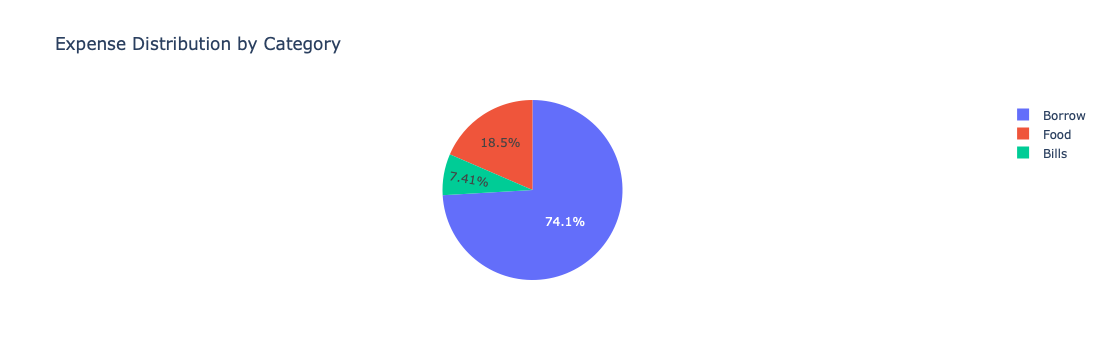

In [90]:
#PIE PLOT
def plot_expense_by_category():
    category_spending = expenses_df.groupby('Category')['Amount'].sum().reset_index()
    fig = px.pie(category_spending, names='Category', values='Amount', title='Expense Distribution by Category')
    fig.show()

plot_expense_by_category()

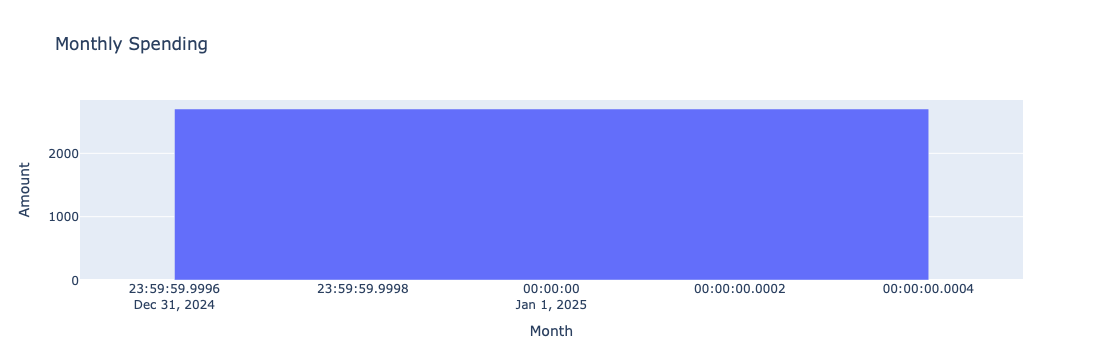

In [91]:
#BAR CHART
def plot_expenses_by_month():
    expenses_df['Date'] = pd.to_datetime(expenses_df['Date'])
    expenses_df['Month'] = expenses_df['Date'].dt.to_period('M').astype(str)  # Convert Period to String

    monthly_expenses = expenses_df.groupby('Month')['Amount'].sum().reset_index()
    fig = px.bar(monthly_expenses, x='Month', y='Amount', title='Monthly Spending')
    fig.show()

plot_expenses_by_month()

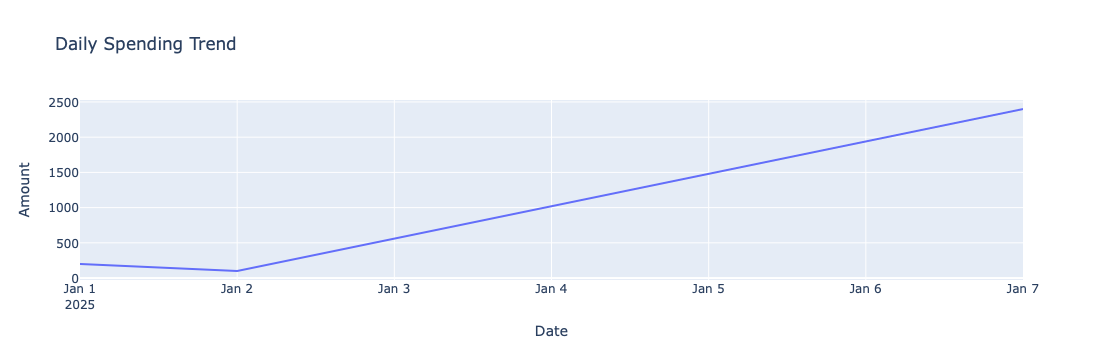

In [92]:
#LINE CHART
def plot_expenses_over_time():
    expenses_df['Date'] = pd.to_datetime(expenses_df['Date'])
    daily_expenses = expenses_df.groupby('Date')['Amount'].sum().reset_index()

    fig = px.line(daily_expenses, x='Date', y='Amount', title='Daily Spending Trend')
    fig.show()

plot_expenses_over_time()

In [93]:
##User can set the categry budget from here
category_budget = {
    'Food': 6000,
    'Entertainment': 2000,
    'Bills': 5000,
}

In [94]:
def check_budget():
    category_spending = expenses_df.groupby('Category')['Amount'].sum().reset_index()
    
    for index, row in category_spending.iterrows():
        category = row['Category']
        spent = row['Amount']
        
        if category in category_budget:
            budget = category_budget[category]
            if spent > budget:
                print(f"Alert: You have exceeded your {category} budget! Spent: ${spent}, Budget: ${budget}")
            else:
                print(f"Good job! You are within your {category} budget. Spent: ${spent}, Budget: ${budget}")
        else:
            print(f"No budget set for {category}.")
    

check_budget()

Good job! You are within your Bills budget. Spent: $200.0, Budget: $5000
No budget set for Borrow.
Good job! You are within your Food budget. Spent: $500.0, Budget: $6000


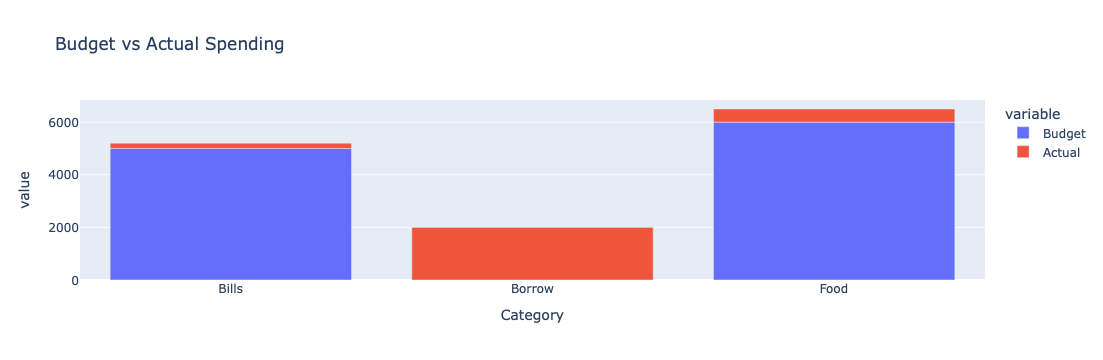

In [95]:
#Monthly Budget vs Actual Spending Visualization
def plot_budget_vs_actual():
    actual_spending = expenses_df.groupby('Category')['Amount'].sum().reset_index()

    comparison = pd.DataFrame(columns=['Category', 'Budget', 'Actual'])
    comparison['Category'] = actual_spending['Category']
    comparison['Budget'] = comparison['Category'].apply(lambda x: category_budget.get(x, 0))
    comparison['Actual'] = actual_spending['Amount']

    fig = px.bar(comparison, x='Category', y=['Budget', 'Actual'], title='Budget vs Actual Spending')
    fig.show()


plot_budget_vs_actual()

In [97]:
#CHECK EXPENSES SUMMARY
def check_expenses_summary():
    total_spent = expenses_df['Amount'].sum()
    print(f"Total Expenses: ${total_spent:.2f}")

    # Define the budget for the month
    monthly_budget = 12000  # Example budget

    if total_spent > monthly_budget:
        print(f"Warning: You have exceeded your budget by ${total_spent - monthly_budget:.2f}!")
    else:
        print(f"You are within your budget. You have ${monthly_budget - total_spent:.2f} remaining.")


check_expenses_summary()

Total Expenses: $2700.00
You are within your budget. You have $9300.00 remaining.


In [98]:
#Expenses forcasting n predictions
#change steps values for predictions dates range
from statsmodels.tsa.arima.model import ARIMA

def forecast_expenses():
    expenses_df['Date'] = pd.to_datetime(expenses_df['Date'])
    daily_expenses = expenses_df.groupby('Date')['Amount'].sum()

    model = ARIMA(daily_expenses, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=10)  
    return forecast

forecast = forecast_expenses()
print(forecast)

3     1874.685191
4     2168.206755
5      972.787627
6      551.793929
7      137.769764
8     1019.247237
9     1356.367830
10    1986.513209
11    1609.460089
12    1242.970985
Name: predicted_mean, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parame

In [99]:
#Used to export the entries for offline uses
def export_data():
    file_format = input("Choose export format (CSV/Excel): ").lower()
    if file_format == 'csv':
        expenses_df.to_csv('expenses.csv', index=False)
        print("Data exported to expenses.csv")
    elif file_format == 'excel':
        expenses_df.to_excel('expenses.xlsx', index=False)
        print("Data exported to expenses.xlsx")
    else:
        print("Invalid format selected!")

# Export the data
export_data()

Choose export format (CSV/Excel):  CSV


Data exported to expenses.csv


In [100]:
expenses_df.to_csv('expenses.csv', index=False)

# Reload the data from the CSV file
expenses_df = pd.read_csv('expenses.csv')